In [1]:
# CREDIT CARD FRAUD DETECTION USING RANDOM FOREST

In [2]:
# Importing necessary Libraries

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [11]:
import warnings

In [12]:
warnings.filterwarnings('ignore')

In [13]:
# loading the dataset

In [14]:
df = pd.read_csv('C:/Users/Sangee/Desktop/creditcard.csv')

In [15]:
print("Dataset loaded successfully!")

Dataset loaded successfully!


In [16]:
# Exploring the basic information of the dataset

In [17]:
print("\nDataset shape:", df.shape)


Dataset shape: (284807, 31)


In [18]:
print("\nClass distribution:\n", df['Class'].value_counts())


Class distribution:
 Class
0    284315
1       492
Name: count, dtype: int64


In [19]:
# Visualizing Class Distribution

In [26]:
plt.figure(figsize=(6,4))

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

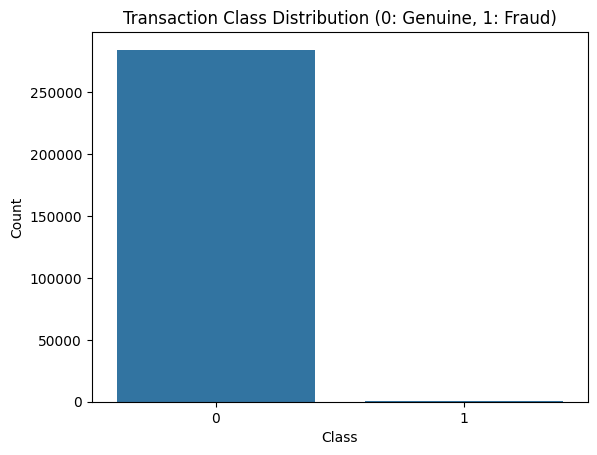

In [27]:
sns.countplot(x='Class', data=df)
plt.title('Transaction Class Distribution (0: Genuine, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [28]:
# Feature Scaling

In [29]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])
df = df.drop(columns=['Time'])

In [30]:
# Handling class imbalance using undersampling

In [31]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
balanced_df = pd.concat([fraud, non_fraud]).sample(frac=1, random_state=42)

In [32]:
X = balanced_df.drop('Class', axis=1)
y = balanced_df['Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [34]:
# Train Random Forest Model

In [35]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [36]:
# Predictions and Evaluation

In [37]:
y_pred = model.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        99
           1       0.97      0.91      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [38]:
print("Confusion Matrix:")

Confusion Matrix:


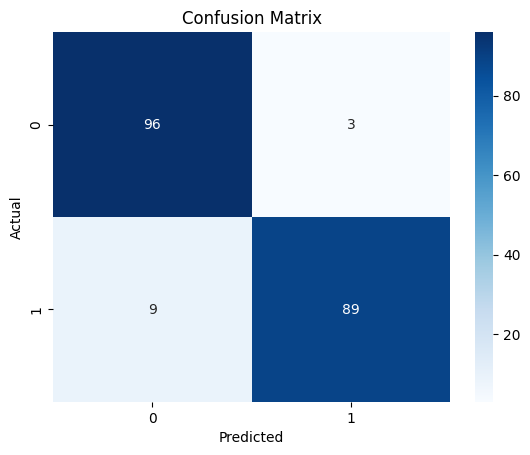

In [39]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
#ROC Curve and AUC 

In [41]:
y_scores = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

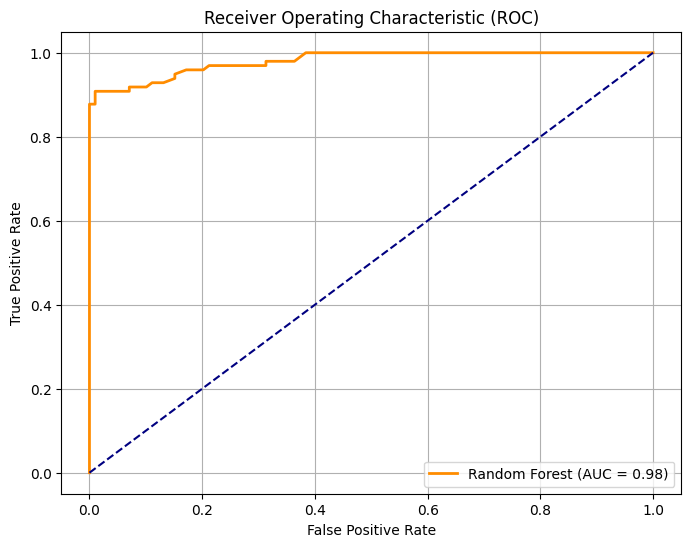

In [42]:
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [43]:
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.9803133374561945
